In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('/content/drive/My Drive/Test/HW4/5/income_Q5.csv', header = None, skiprows = 1)
data = (df.iloc[:, :-1]).to_numpy()
labels = (df.iloc[:, -1]).to_numpy()

In [70]:
# split data into tarin and test -> 80%, 20%
dim = data.shape
rows_num = 4*dim[0]//5
indx = random.sample(range(dim[0]), rows_num)
test_data = np.delete(data, indx, axis = 0)
test_labels = np.delete(labels, indx, axis = 0)
d = []
l = []
for i in range(rows_num):
  d.append(data[indx[i]])
  l.append(labels[indx[i]])
train_data = np.array(d)
train_labels = np.array(l)

In [84]:
# get different values of a feature
features_val = [None] * 10
for i in range(10):
  features_val[i] = list(np.unique(train_data[:, i]))
  if i == 5 or i == 9:
    features_val[i].remove('?')

In [68]:
def Calculate_P(data, features_val):
  N = (data.shape)[0]
  v = len(features_val)
  p = np.ones(v + 1)  #implementing laplace method
  for i in range(N):
    for j in range(v):
      if data[i] == features_val[j]:
        p[j] += 1
  p /= (N + v + 1)
  return list(p)

In [ ]:
def Train(data, labels, features_val):
  N = (data.shape)[0]
  M = (data.shape)[1]
  P_c = np.zeros(2)
  Class = np.unique(labels)
  for i in range(N):
    for j in range(2):
      if labels[i] == Class[j]:
        P_c[j] += 1
  P_c /= N
  p = np.zeros((2, 10)).tolist()
  for i in range(M):
    for j in range(2):
      help = np.copy(data[np.where(labels == Class[j])[0], ])
      p[j][i] = Calculate_P(help[:, i], features_val[i])
  return p, P_c

In [66]:
def Test(data, P_w, features_val, P_c):
  N = (data.shape)[0]
  M = (data.shape)[1]
  predicted_labels = np.zeros(N)
  for i in range(N):
    prob = np.ones(2)
    for j in range(2):
      for k in range(M):
        try:
          indx = features_val[k].index(data[i][k])
        except ValueError:
          indx = -1
        prob[j] *= P_w[j][k][indx]
      prob[j] *= P_c[j]
    predicted_labels[i] = np.argmax(prob)
  return predicted_labels

In [ ]:
def Result(predicted_labels, labels):
  count = 0
  N = (labels.shape)[0]
  new_label = np.zeros(N)
  for i in range(N):
    if labels[i] == '>50K':
      new_label[i] = 1
  confusion_matrix = np.zeros((2, 2))
  for i in range(N):
    confusion_matrix[int(new_label[i])][int(predicted_labels[i])] += 1
    if (new_label[i] == predicted_labels[i]):
      count += 1
  print("accuracy is:", count/N)
  ax = plt.axes()
  sns.heatmap(confusion_matrix, annot = True, fmt = '.0f' , ax = ax)
  plt.show()

accuracy is: 0.8102159893540792


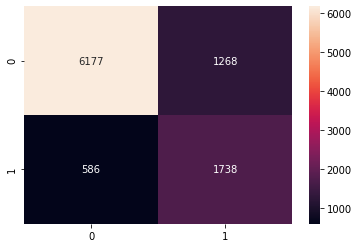

In [72]:
p, P_c = Train(train_data, train_labels, features_val)
predicted_labels = Test(test_data, p, features_val, P_c)
Result(predicted_labels, test_labels)